In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
# Path to the CSV file
csv_file_path = 'test_data.csv'

# Read the data from the CSV file
df = pd.read_csv(csv_file_path)

# Convert 'time' from milliseconds to seconds for plotting
df['time_seconds'] = df['time'] / 1000



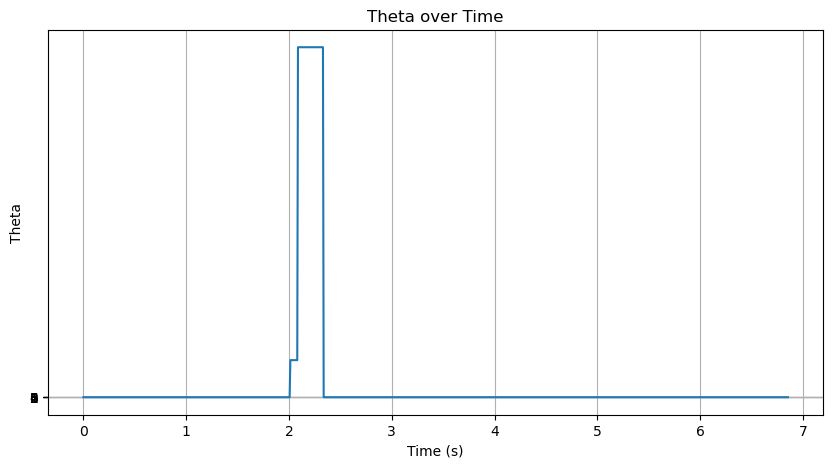

In [10]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df['time_seconds'], df['theta'])
plt.xlabel('Time (s)')
plt.ylabel('Theta')
plt.title('Theta over Time')
plt.grid(True)

# Set the y-axis labels to display every second
plt.yticks(range(0, int(df['time_seconds'].max()) + 1, 1))

# Show the plot
plt.show()


In [52]:
from filterpy.kalman import KalmanFilter

In [53]:
# filter data of theta

theta = df['theta'].values


kf = KalmanFilter(dim_x=1, dim_z=1)  # 1 state variable, 1 measurement

kf.F = np.array([[1]])  # State transition matrix
kf.H = np.array([[1]])  # Measurement function

kf.Q = np.array([[0.001]])  # Process noise covariance
kf.R = np.array([[0.1]])   # Measurement noise covariance
kf.P = np.array([[1]])     # Initial covariance matrix

kf.x = np.array([[0]])  # Initial state (e.g., starting at 0)


# measurements = [5, 6, 7, 9, 10, 12]  # Example noisy data
predictions = []

for t in theta:
    kf.predict()  # Predict next state
    kf.update(t)  # Update with new measurement
    predictions.append(kf.x[0, 0])  # Store filtered value

# print("Filtered data:", predictions)

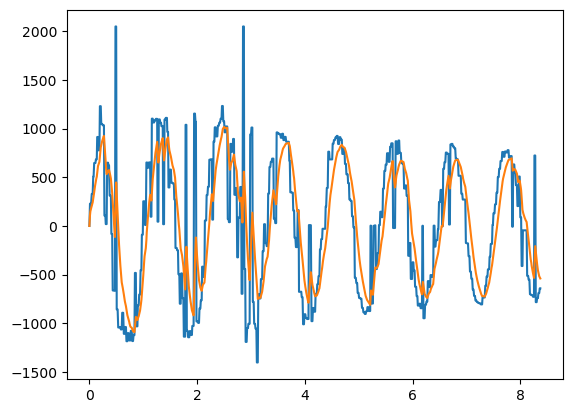

In [54]:
plt.plot(df['time_seconds'], df['theta'])
plt.plot(df['time_seconds'], predictions)

In [55]:
# Kalman filter implementation
def Kalman_filter(F, H, Q, R, x_init, P_init, measurements):
    N = len(measurements)  # Number of time steps
    # N = measurements.shape[1]
    x = x_init  # Initialize state estimate
    P = P_init  # Initialize error covariance
    x_estimates = np.zeros((x.shape[0], N))  # Store state estimates
    P_estimates = []    # List to store error covariance matrices


    for t in range(N):
        # Prediction step
        x_pred = F @ x                      # Predicted state
        P_pred = F @ P @ F.T + Q            # Predicted error covariance

        # Measurement update
        y = measurements[t]                                     # Current measurement
        K = P_pred @ H.T @ np.linalg.inv(H @ P_pred @ H.T + R)  # Kalman Gain
        x = x_pred + K @ (y - H @ x_pred)                       # Update state estimate
        P = (np.eye(P.shape[0]) - K @ H) @ P_pred               # Update error covariance

        # Save the estimate
        x_estimates[:, t] = x.flatten()
        P_estimates.append(P)

    return x_estimates.flatten(), P_estimates

# applying moving average on output data of kalman filter
def moving_average(data, window_size):
    cumsum = np.cumsum(data)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size


In [56]:
# Parameters
F = np.array([[1]])  # State transition matrix (assume constant acceleration)
H = np.array([[1]])  # Measurement matrix (direct measurement of state)
Q = np.array([[0.001]])  # Process noise covariance (system uncertainty)
R = np.array([[0.1]])  # Measurement noise covariance (sensor uncertainty)
x_init = np.array([[0]])  # Initial state estimate (e.g., acceleration)
P_init = np.array([[1]])  # Initial error covariance

output_kalman, _ = Kalman_filter(F, H, Q, R, x_init, P_init, theta)

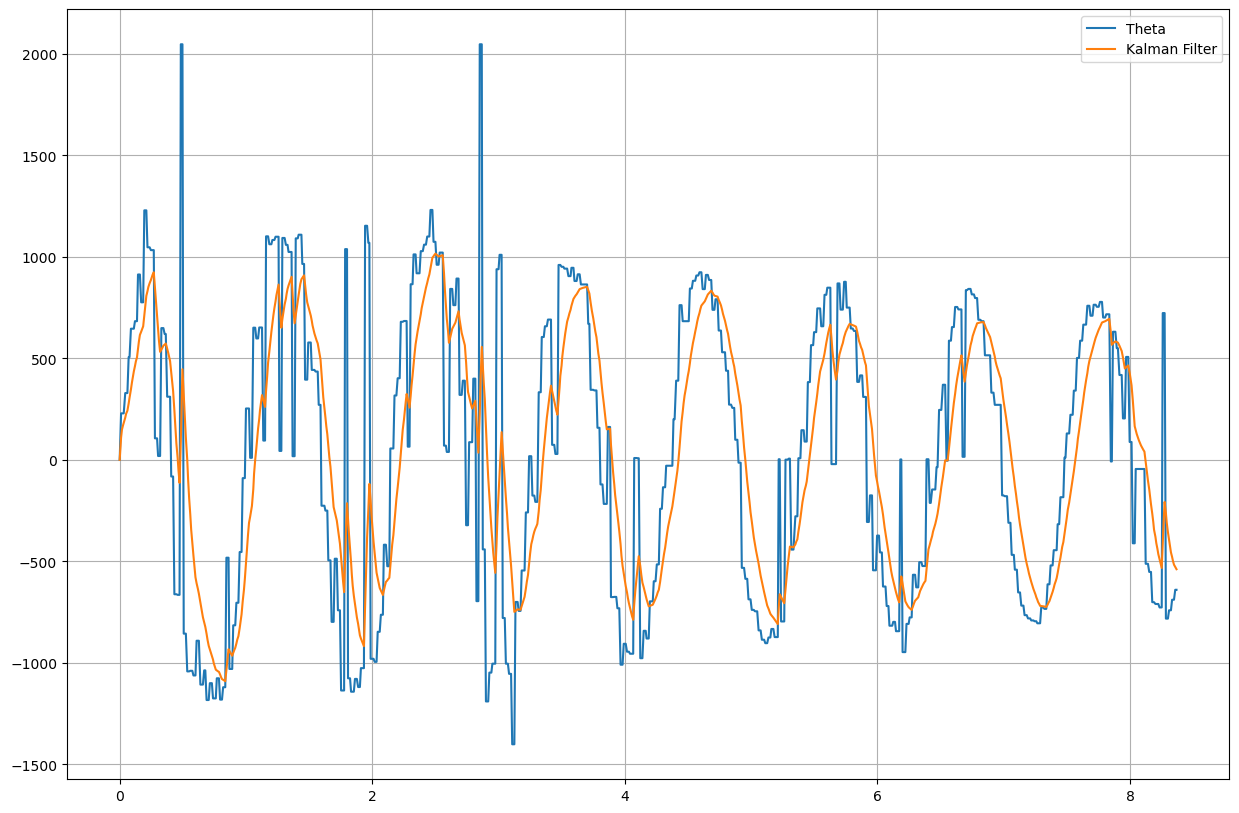

In [59]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df['time_seconds'], df['theta'], label='Theta')
ax.plot(df['time_seconds'], output_kalman, label='Kalman Filter')
ax.legend()
plt.grid(True)
plt.show()
# plt.plot(df['time_seconds'], df['theta'])
# plt.plot(df['time_seconds'], output_kalman)
# plt.plot(df['time_seconds'], predictions)

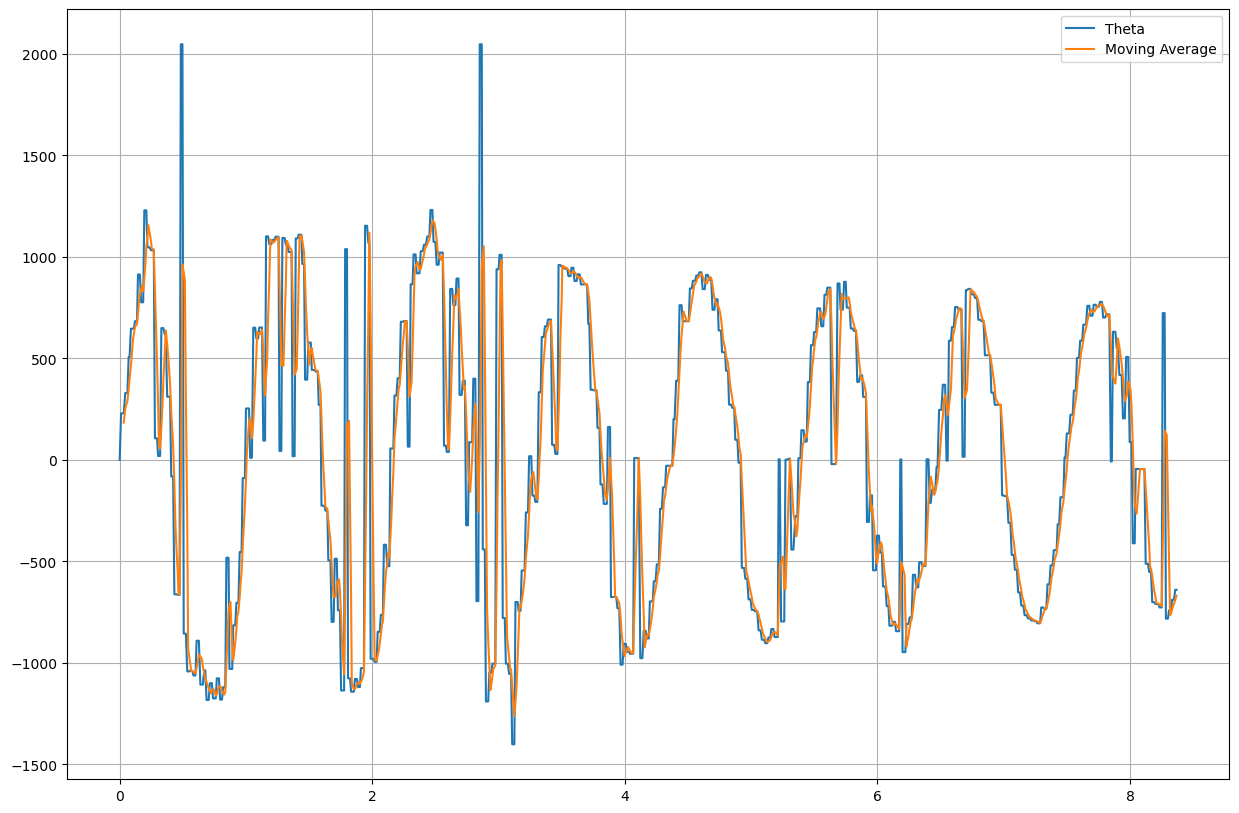

In [61]:
moving_average_theta = moving_average(theta, 5)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df['time_seconds'], df['theta'], label='Theta')
ax.plot(df['time_seconds'][4:], moving_average_theta, label='Moving Average')
ax.legend()
plt.grid(True)
plt.show()
# plt.plot(df['time_seconds'][4:], df['theta'][4:])
# plt.plot(df['time_seconds'][4:], moving_average_theta)



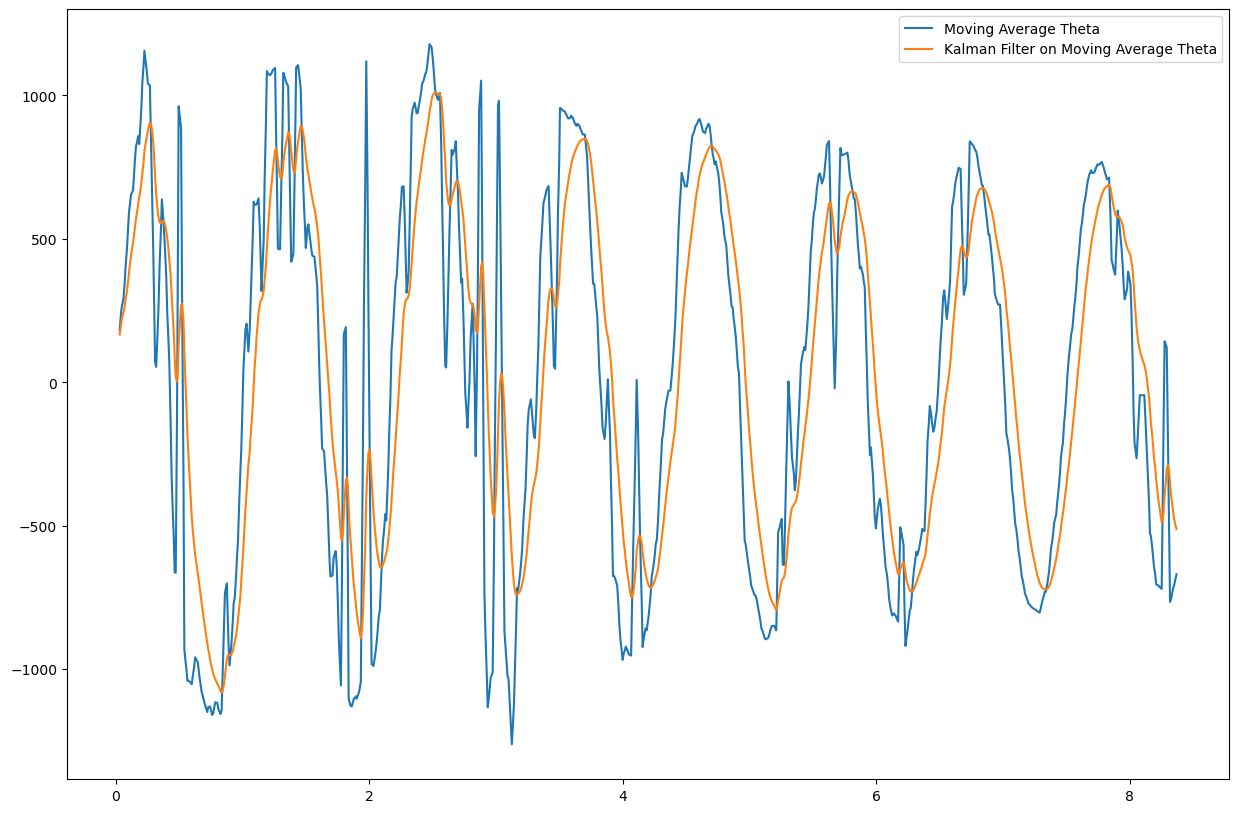

In [62]:
output_kalman1, _ = Kalman_filter(F, H, Q, R, x_init, P_init, moving_average_theta)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df['time_seconds'][4:], moving_average_theta, label='Moving Average Theta')
ax.plot(df['time_seconds'][4:], output_kalman1, label='Kalman Filter on Moving Average Theta')
ax.legend()
plt.show()


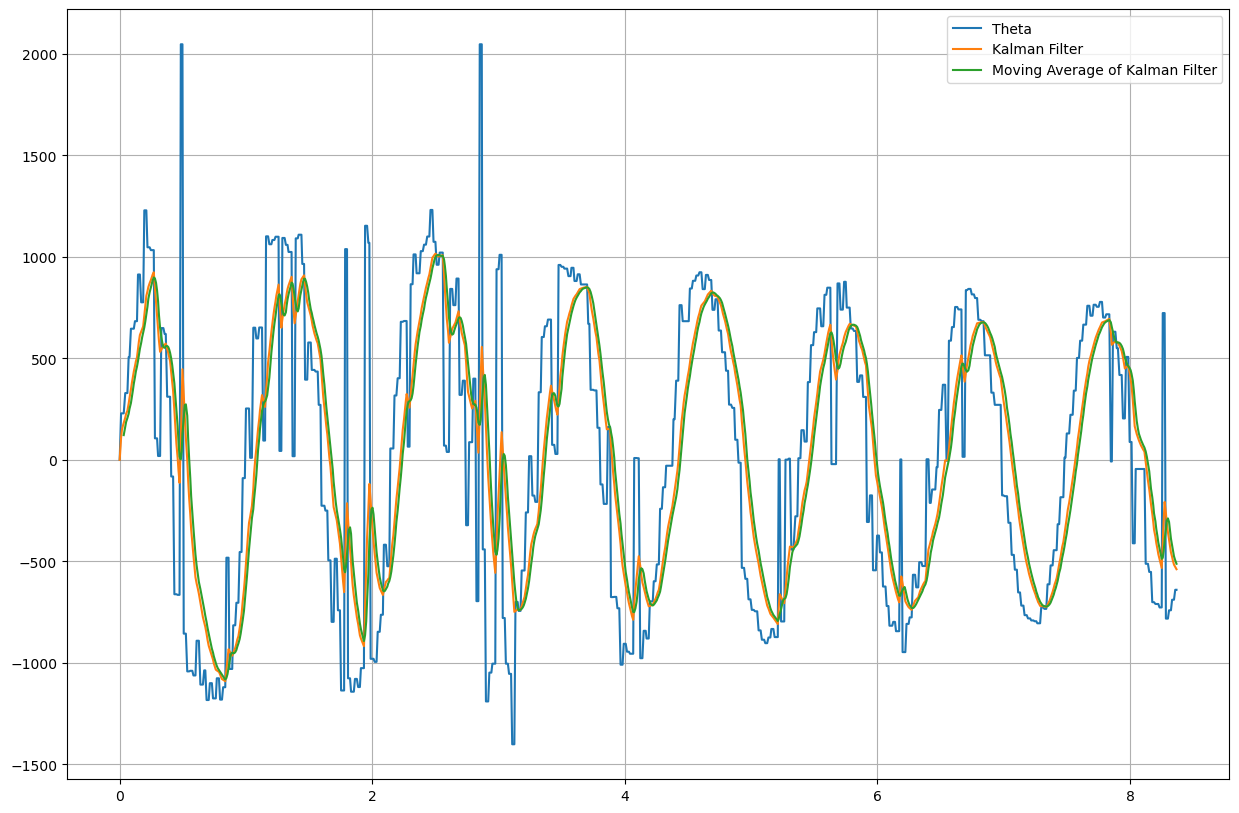

In [64]:


output_kalman_moving_avg = moving_average(output_kalman, 5)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df['time_seconds'], df['theta'], label='Theta')
ax.plot(df['time_seconds'], output_kalman, label='Kalman Filter')
ax.plot(df['time_seconds'][4:], output_kalman_moving_avg, label='Moving Average of Kalman Filter')
ax.legend()
plt.grid(True)
plt.show()